In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.pandas.set_option('display.max_columns', None)

In [98]:
df = pd.read_csv('data/train.csv')
print('shape:', df.shape)
print('')
df.head()

shape: (1460, 81)



Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [99]:
# drop id
df.drop('Id', axis=1, inplace=True)

--------

<H2> Target Handling - "SalePrice"

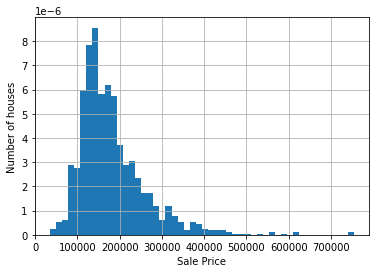

In [100]:
df['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

Target value is continuous and the distribution is skewed towards the right side

Using the log transform we turn it to a guassian-like shape



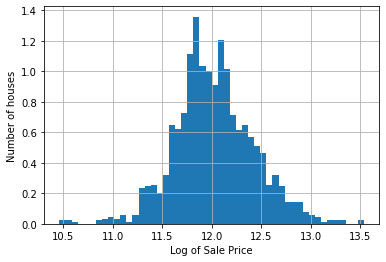

In [101]:
print("Using the log transform we turn it to a guassian-like shape")
print('')
np.log(df['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Sale Price')
plt.show()

 📌 Log transforming the SalePrice helps because:
1. Many ML models (like Linear Regression) perform better with normally distributed targets.

2. Reduces heteroscedasticity (Model errors vary at different levels of the input).

3. Makes relationships more linear, improving regression accuracy when using linear models.

-----------

<h2 Variables

<h2> Variables Handling

In [102]:
set(df.dtypes.values)

{dtype('int64'), dtype('float64'), dtype('O')}

<h3> Categorical

In [103]:
categorical_vars = [var for var in df.columns if df[var].dtype == 'O']

# MSSubClass might me int but it describes categories.
categorical_vars = categorical_vars + ['MSSubClass']

len(categorical_vars)

44

<h3> Numerical

In [104]:
numerical_vars = [var for var in df.columns if var not in categorical_vars and var != 'SalePrice']

len(numerical_vars)

35

-----

<h2> Missing Values

In [105]:
null_vars = [var for var in df.columns if df[var].isnull().sum() > 0]
print('# variables containing null:', len(null_vars))
print('')
null_percentages = df[null_vars].isnull().mean().sort_values(ascending=False)
print(null_percentages)

# variables containing null: 19

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64


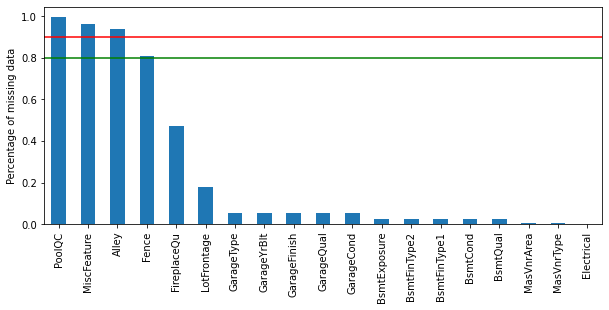

In [106]:
df[null_vars].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

 📌 Drop features with >80% nulls unless they hold key info  
 - Too many missing values → low predictive power  
 - Imputation may introduce bias  
 - Exception: Missingness itself might have meaning

In [107]:
#df.dropna(thresh=len(df) * 0.2, axis=1, inplace=True)

------------------

<h2> Year-Temporal Variables

We have 4 year variables in the dataset:

- YearBuilt: year in which the house was built
- YearRemodAdd: year in which the house was remodeled
- GarageYrBlt: year in which a garage was built
- YrSold: year in which the house was sold

We generally don't use date variables in their raw format. Instead, we extract information from them. For example, we can capture the difference in years between the year the house was built and the year the house was sold.

Fow now lets plot some stuff

In [108]:
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'Median House Price')

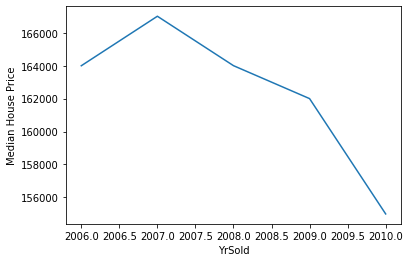

In [109]:
# plot median sale price vs year in which it was sold

df.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

 📌 Median house prices dropped (2006-2010) which is odd → Likely due to 2008 housing crisis  
 - Shows macroeconomic impact on real estate  
 - Macroeconomic factors can influence predictions.
   A model trained on this period might not generalize well to other time frames. 
 - Be cautious when generalizing the model to other time periods 

Lets now make plots that make sense!

Text(0, 0.5, 'Median House Price')

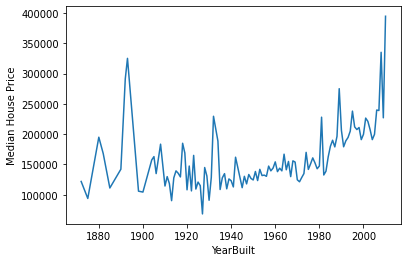

In [110]:
# plot median sale price vs year in which it was built

df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

📌 Median house prices increase considering how new they are

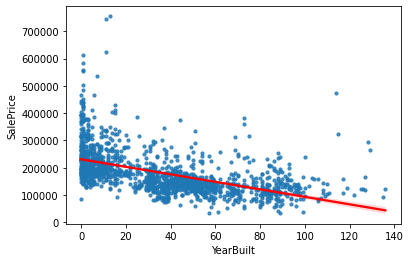

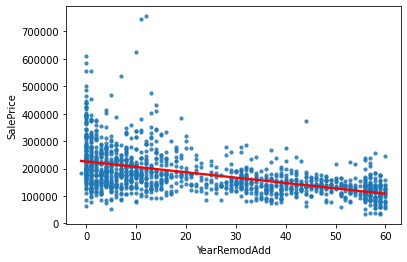

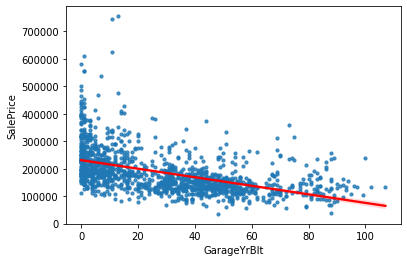

In [111]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    # capture difference between a year variable and year in which the house was sold
    df[var] = df['YrSold'] - df[var]
    sns.regplot(x=df[var], y=df['SalePrice'], scatter_kws={'s': 10},
                                              line_kws={'color': 'red'}) 
    #plt.scatter(df[var], df['SalePrice'], s=10)
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(df, var)

📌 We see that there is a tendency to a decrease in price, with older houses. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price. 

Which makes sense, cause this means that the house will have an older look, and potentially needs repairs.

---------------------------

<h2> Discrete Variables

Spot and analyze variables which are discrete, i.e., show a finite number of values

In [112]:
discrete_vars = [var for var in numerical_vars if len(df[var].unique()) < 30 and var not in year_vars]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  16


In [113]:
df[discrete_vars].head()

OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0            7            5             0             1             0   
1            6            8             0             0             1   
2            7            5             0             1             0   
3            7            5             0             1             0   
4            8            5             0             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           2          0         0        0       2  
1           2          0         0        0       5  
2           2          0         0        0       9  
3           3          0         0        0       2  
4           3          0         0        0      12

Generally these discrete variables tend to be qualifications (Qual) or grading scales (Cond), or refer to the number of rooms, or units (FullBath, GarageCars), or indicate the area of the room (KitchenAbvGr).

We normally expect higher prices, with bigger numbers.

Let's analyse their contribution to the house price.

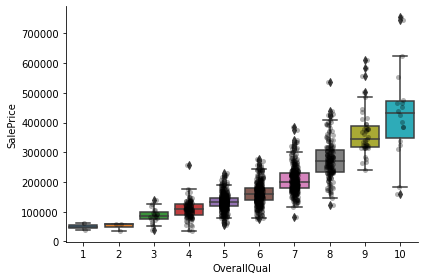

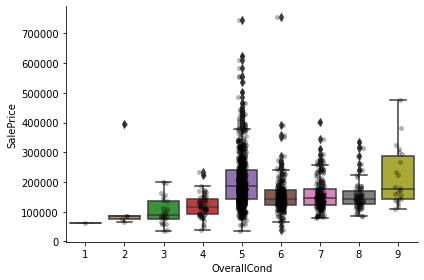

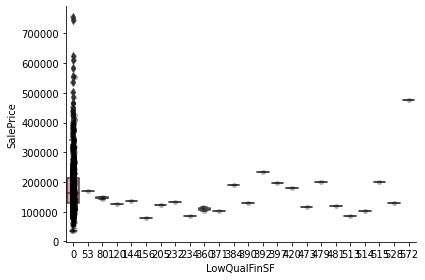

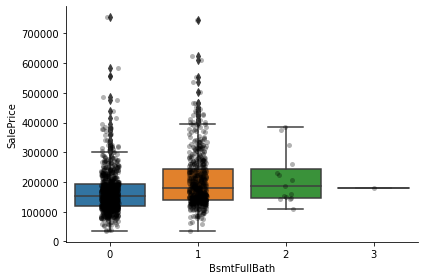

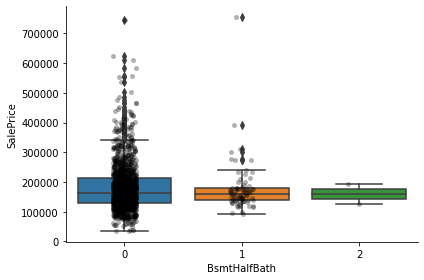

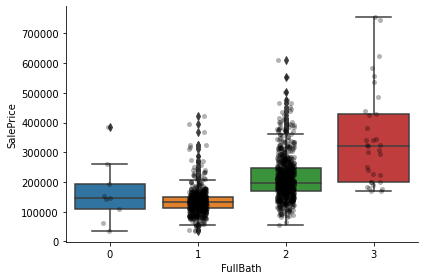

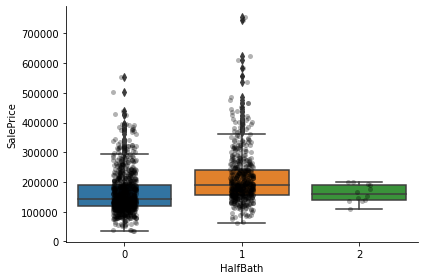

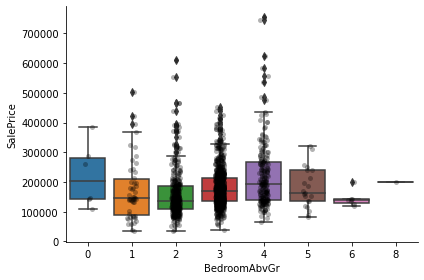

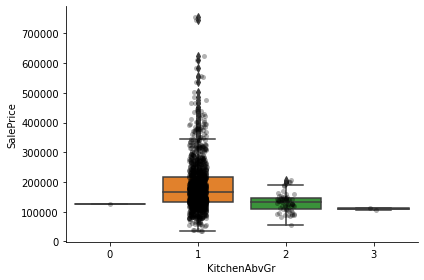

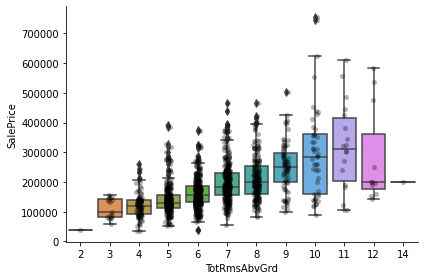

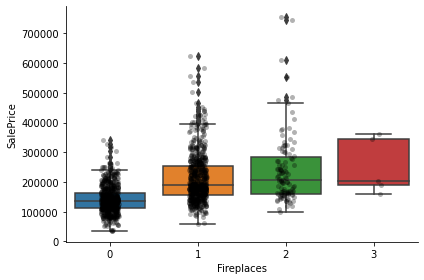

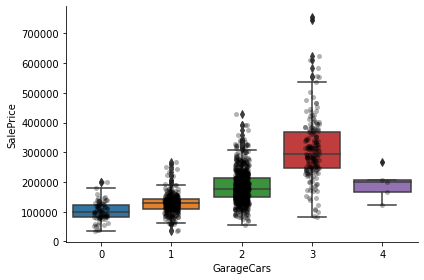

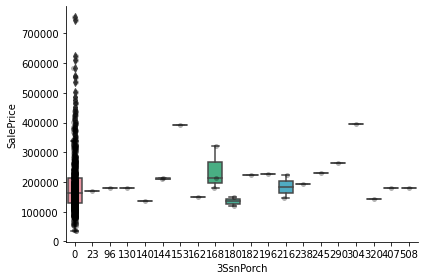

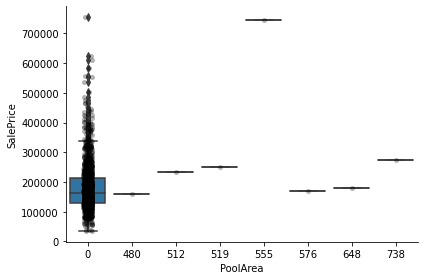

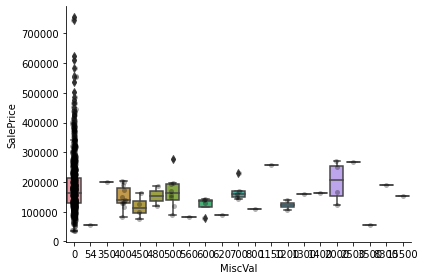

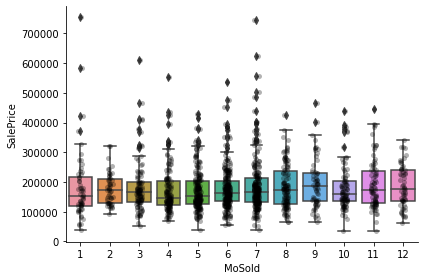

In [114]:
for var in discrete_vars:
    sns.catplot(x=var, y='SalePrice', data=df, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most discrete numerical variables, we see an increase in the sale price, with the quality, or overall condition, or  number of rooms, or surface.

For some variables, we don't see this tendency. Most likely that variable is not a good predictor of sale price and later we will consider dropping them on the feature engineering stage

--------------------

<h2> Continuous Variables

Considering continuous variables all those that are not temporal or discrete.

In [121]:
# make list of continuous variables
cont_vars = [var for var in numerical_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  15


In [122]:
df[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  
0           61              0            0  
1            0              0            0  
2           42              0            0  
3           35            272            0  
4           84              0            0

In [117]:
cont_vars

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

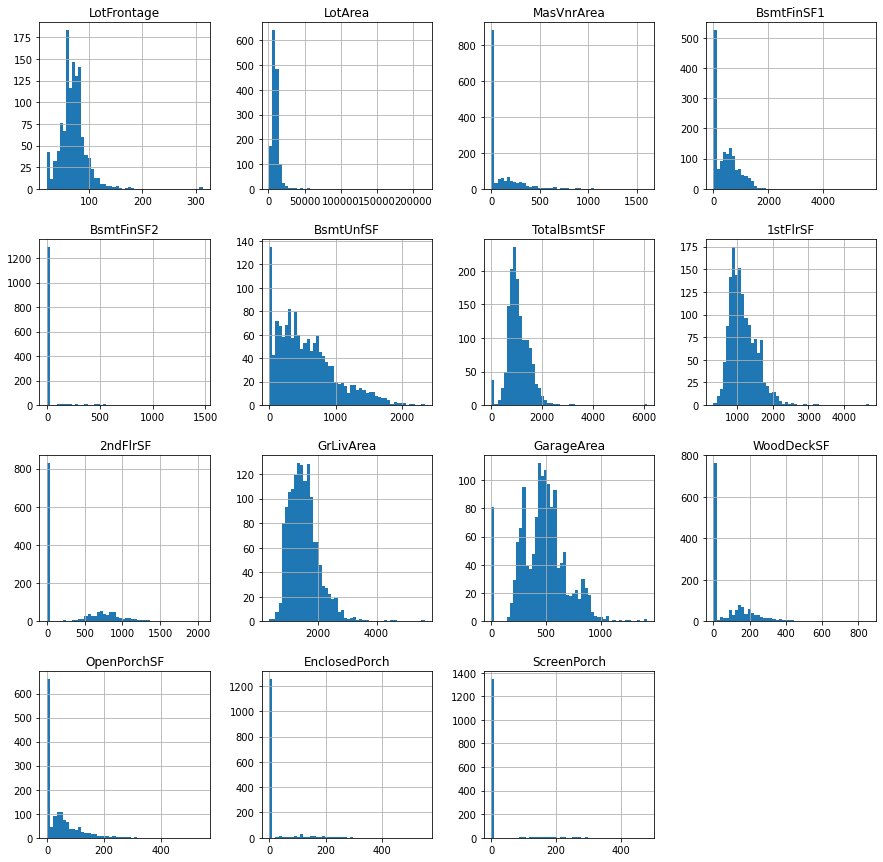

In [118]:
df[cont_vars].hist(bins=50, figsize=(15,15))
plt.show()

In [119]:
# capture the remaining continuous variables

# the most skewed features of discrete + continuous variables
# probably they will be dropped but lets save them for later exploration
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]
cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

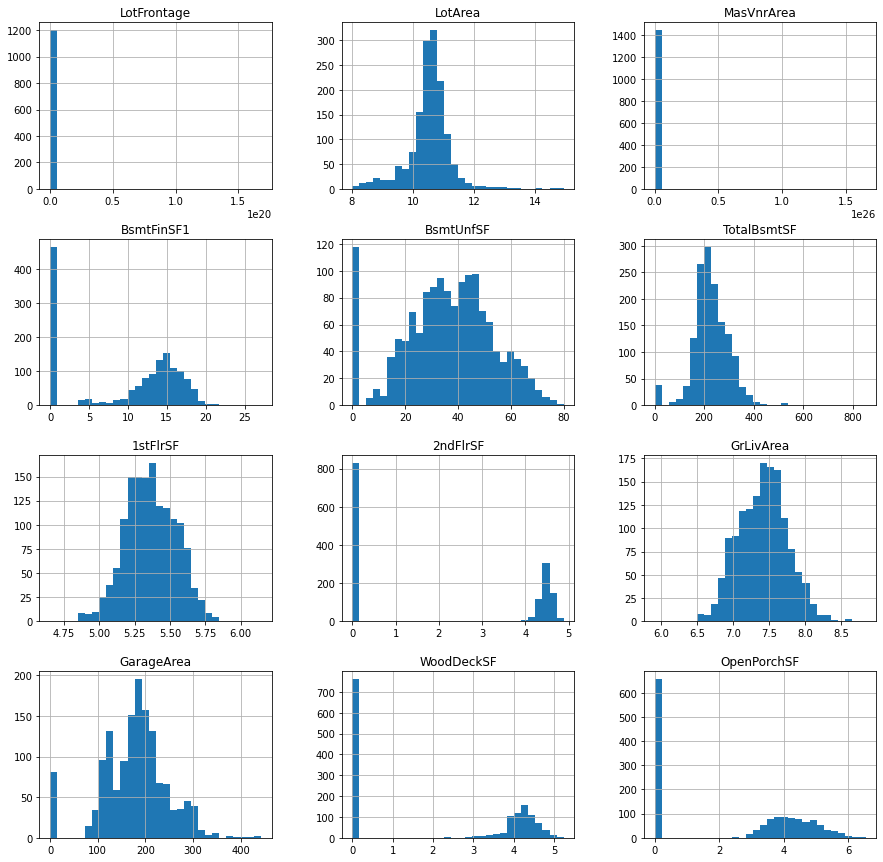

In [91]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
tmp = df.copy()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(df[var])

    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

The variables are not normally distributed.
And there are a particular few that are extremely skewed.

Sometimes, transforming the variables to improve the value spread, improves the model performance. 
But it is unlikely that a transformation will help change the distribution of the super skewed variables dramatically.

## Transforming Continuous Variables for Better Distribution

To improve the spread and normality of continuous variables, we can apply transformations before evaluating their predictive power.

### **1. Log Transformation**  
- Useful for **right-skewed** distributions.  
- Requires **positive values** (cannot handle zeros or negatives).  
- Reduces the impact of large values.

### **2. Yeo-Johnson Transformation**  
- A more **flexible** approach that works for **both positive and negative values**.  
- Dynamically adjusts the transformation parameter (λ) for better symmetry.  
- Similar to Box-Cox but does not require strictly positive values.

### **3. Alternative Transformations**  
- **Box-Cox:** Similar to Yeo-Johnson but only for **positive values**.  
- **Square Root:** Less aggressive than log, useful for **moderate skewness**.  
- **Reciprocal (1/x):** Flattens large values, useful for **strong right-skewed** data.  
- **Quantile Transformation:** Maps data to a **normal** or **uniform** distribution.

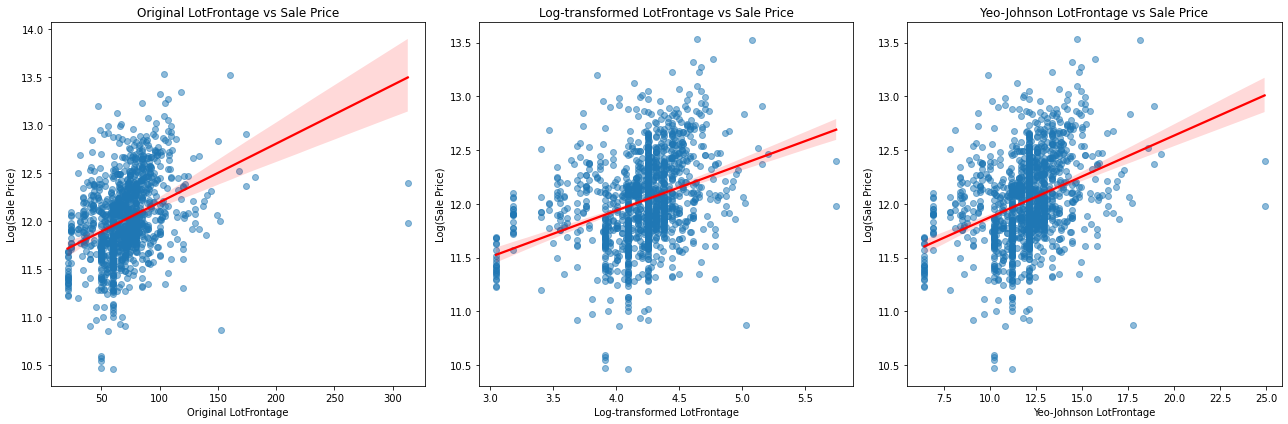

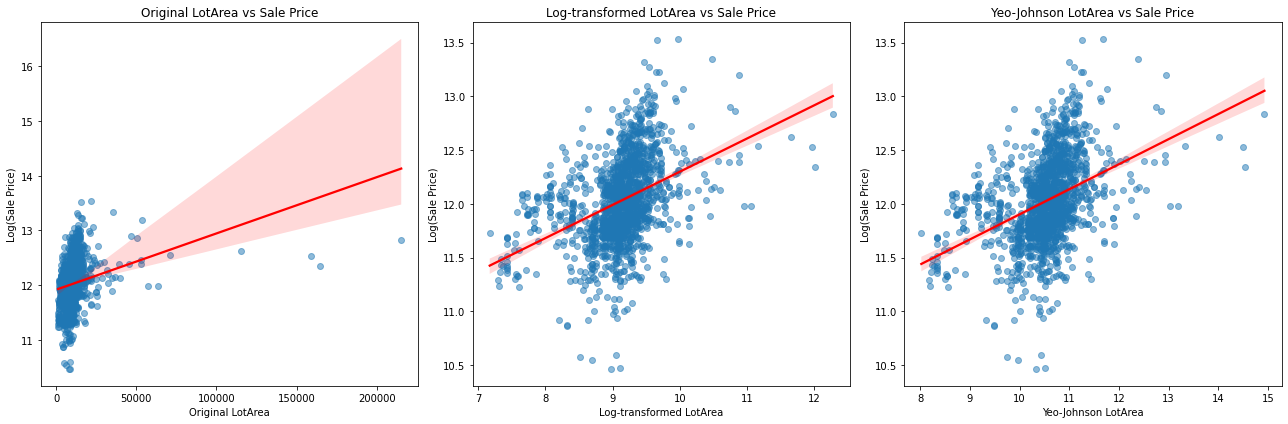

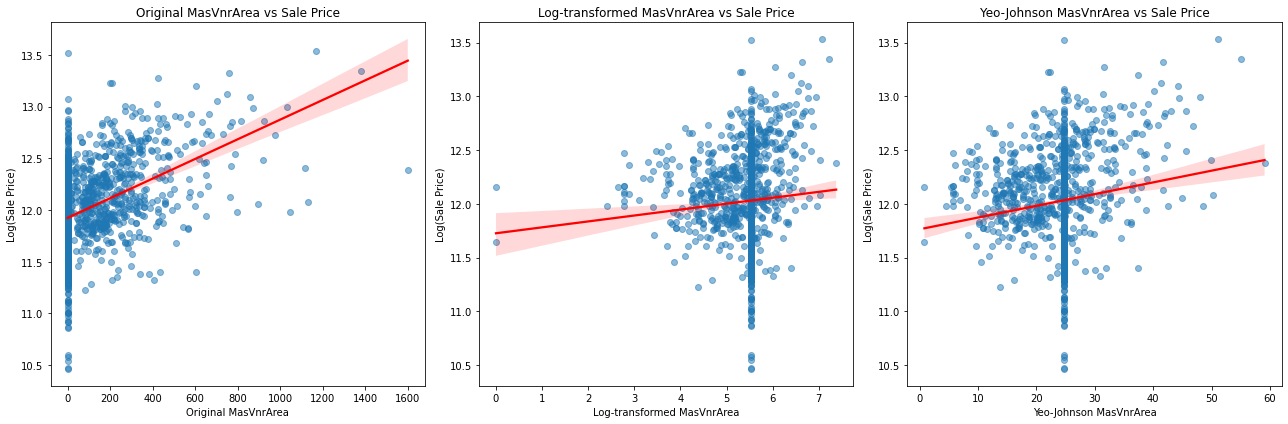

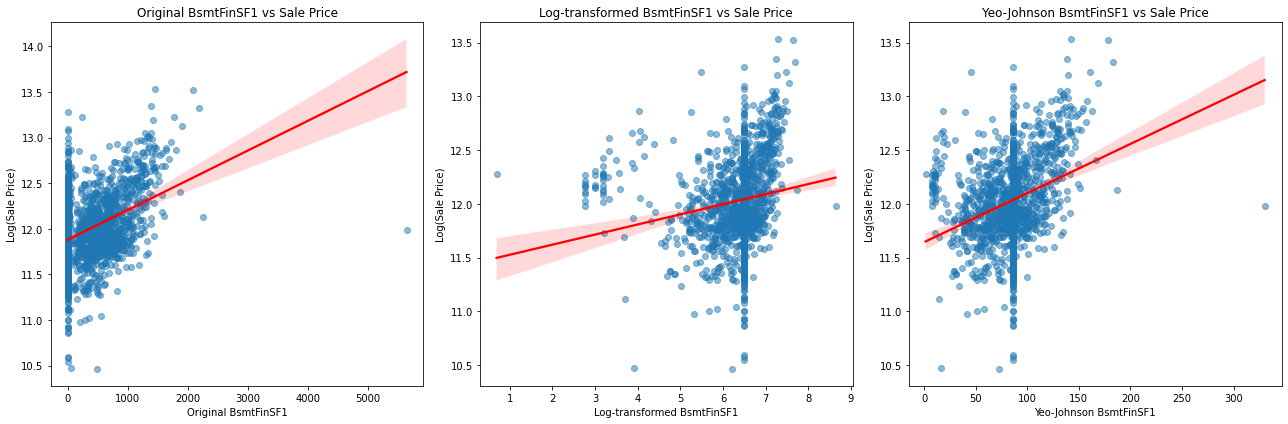

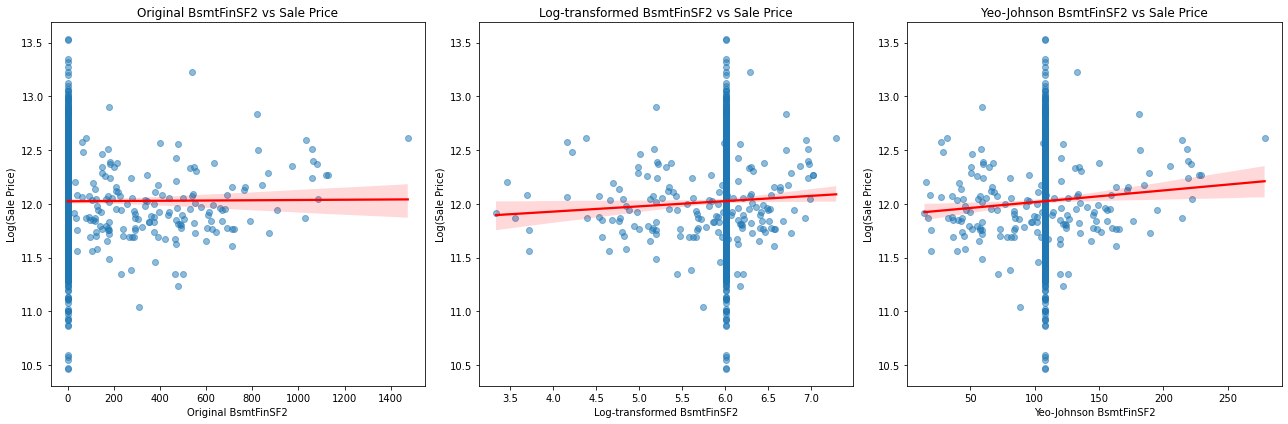

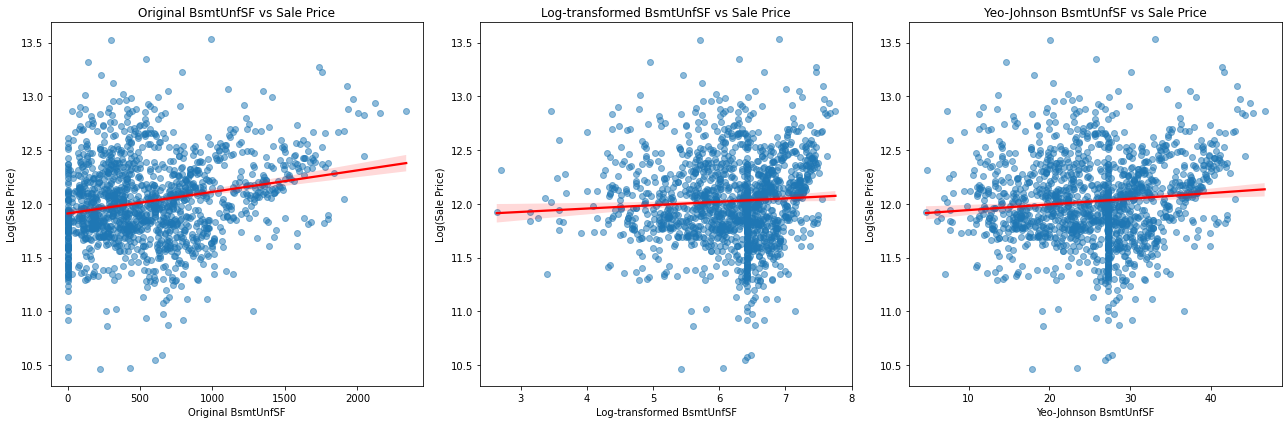

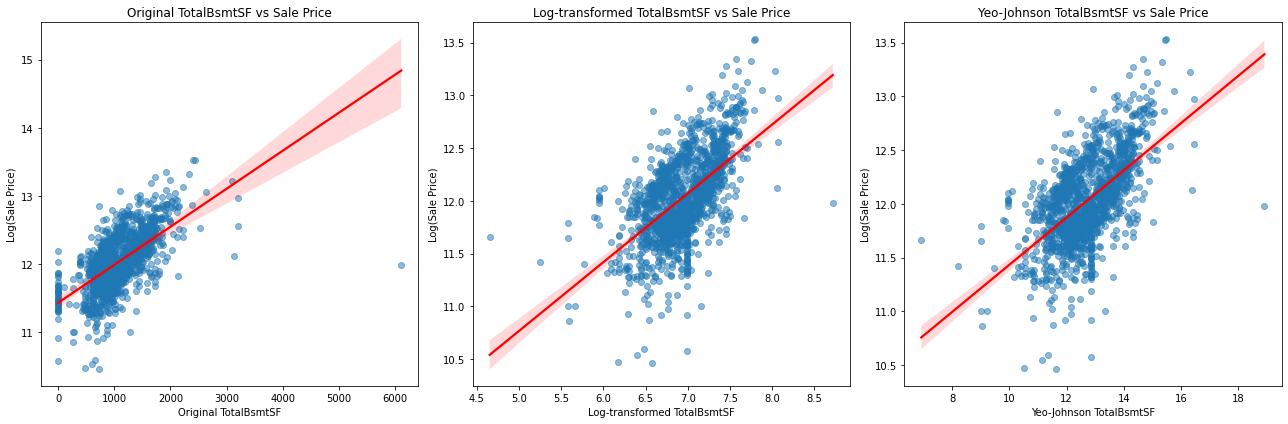

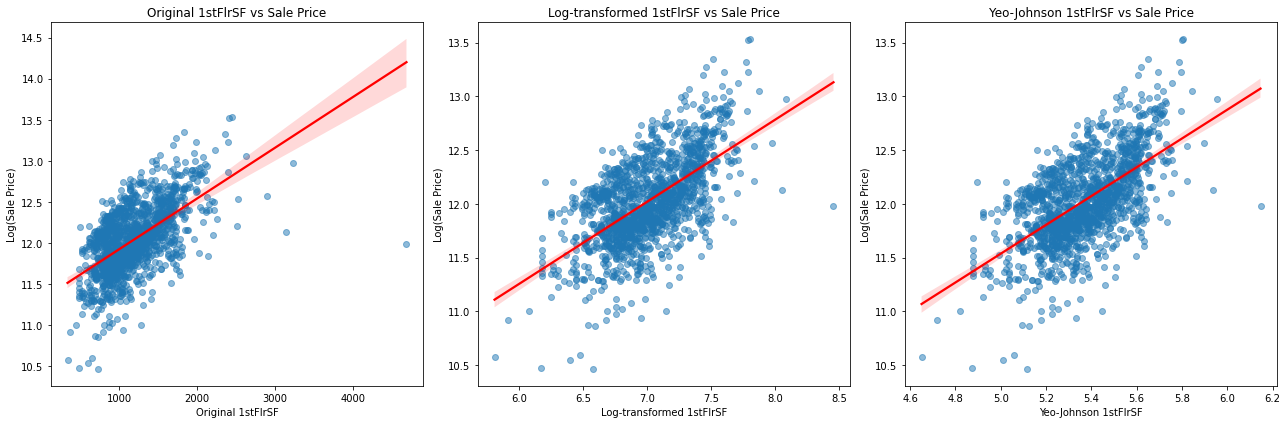

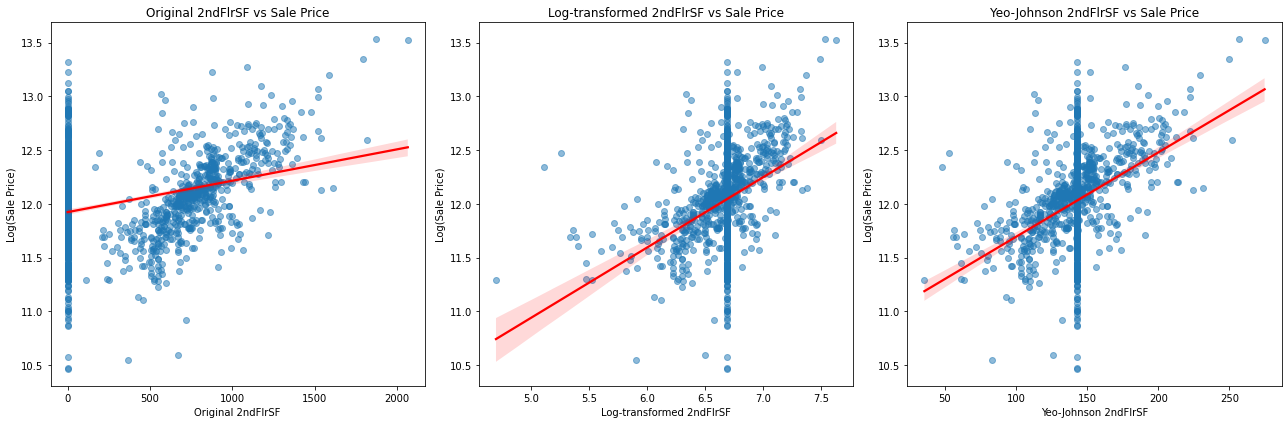

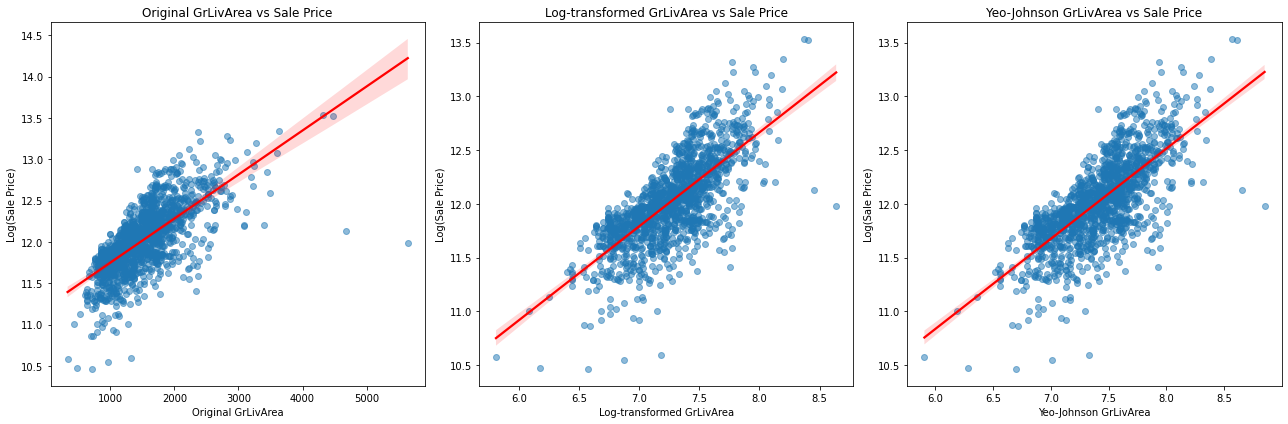

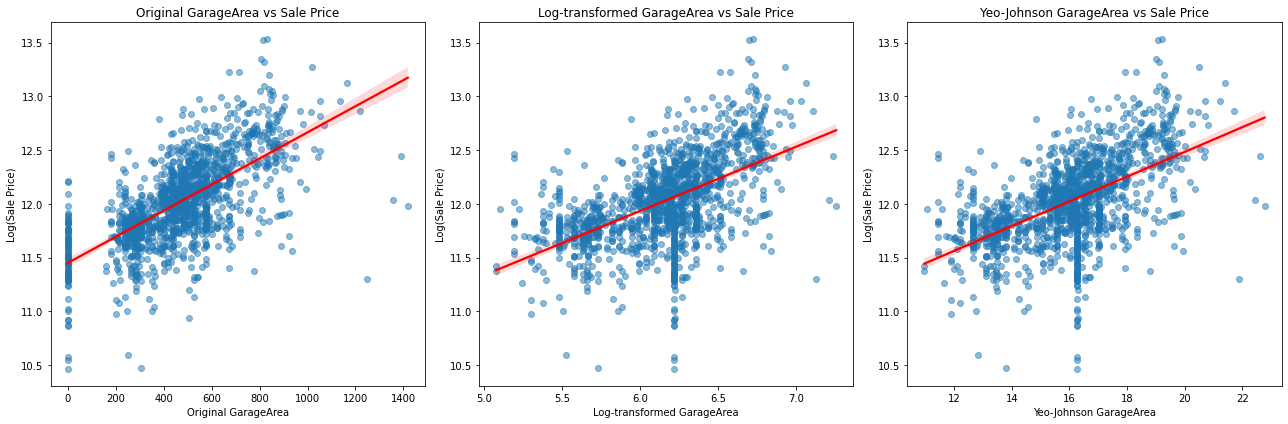

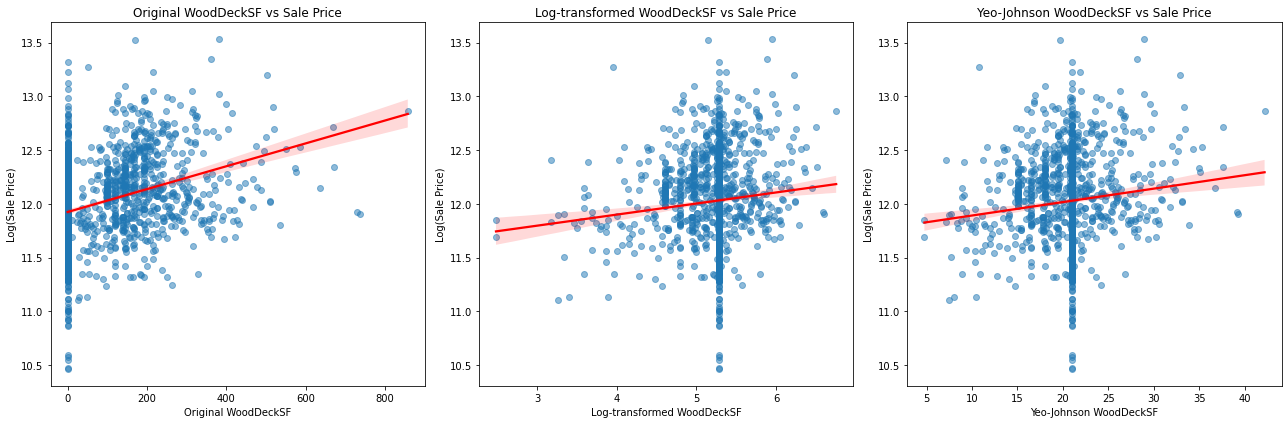

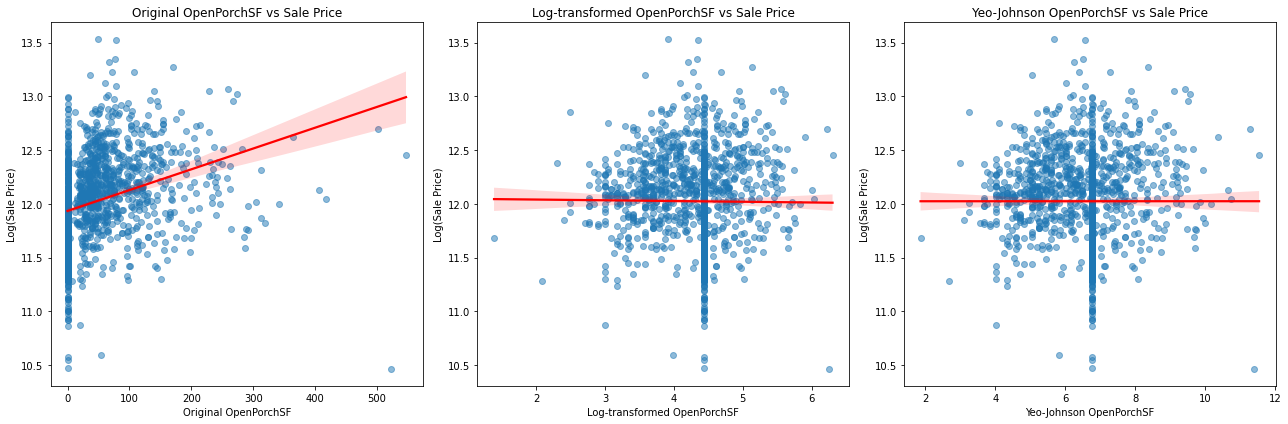

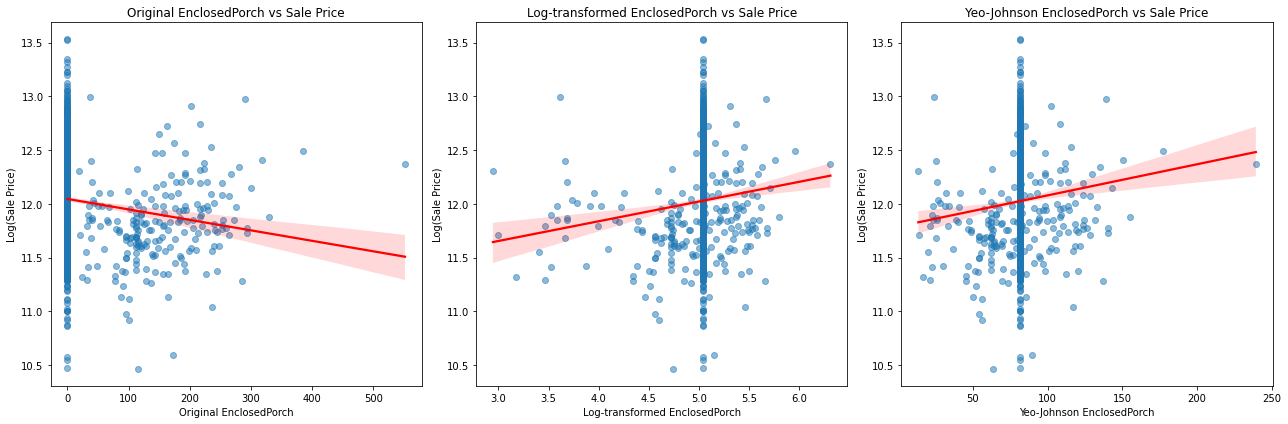

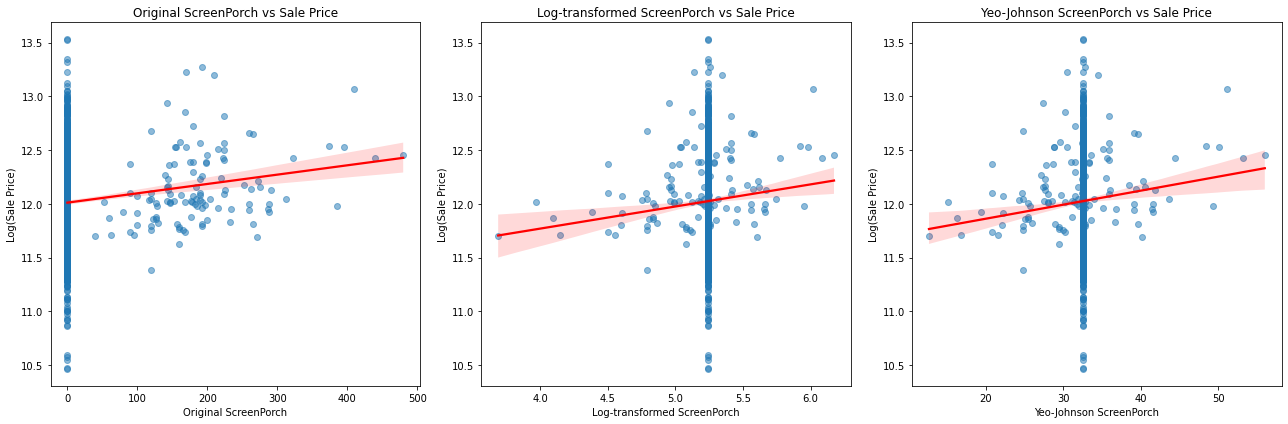

In [133]:
from scipy.stats import yeojohnson
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for var in cont_vars:
    
    # take care of nan for yeo-johnson
    temp_data = df[var].copy()
    temp_data.replace(0, np.nan, inplace=True) 
    temp_data.fillna(temp_data.mean(), inplace=True)
   
    transformed, _ = yeojohnson(temp_data)  
        
    #log_transformed = np.log(temp_data[temp_data > 0])
    log_transformed = np.log(temp_data)
    
    plt.figure(figsize=(18, 6))

    # Originals
    plt.subplot(1, 3, 1)
    sns.regplot(x=df[var], y=np.log(df['SalePrice']), scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel(f"Original {var}")
    plt.ylabel("Log(Sale Price)")
    plt.title(f"Original {var} vs Sale Price")

    # Log-transformed
    plt.subplot(1, 3, 2)
    sns.regplot(x=log_transformed, y=np.log(df['SalePrice']), scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel(f"Log-transformed {var}")
    plt.ylabel("Log(Sale Price)")
    plt.title(f"Log-transformed {var} vs Sale Price")

    # Yeo-Johnson-transformed
    plt.subplot(1, 3, 3)
    sns.regplot(x=transformed, y=np.log(df['SalePrice']), scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel(f"Yeo-Johnson {var}")
    plt.ylabel("Log(Sale Price)")
    plt.title(f"Yeo-Johnson {var} vs Sale Price")

    plt.tight_layout()
    plt.show()


By eye, the transformations seem to improve the relationship for some of the variables like LotArea, TotalBsmntSF, 1stFlrSF, GrLivArea, lotFrontage.
In the next notebooks we might use yeo-johnson for some of these features


Now lets take care of the skewed variables. Lets test if they bring any significance predicting the target.
We will binarize the feature to 0 or 1. This transformation is useful when we want to model the **presence** of a feature rather than its exact size.

In [137]:
skewed

['BsmtFinSF2',
 'LowQualFinSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

                     mean           std
BsmtFinSF2                             
0           182432.860015  81327.661136
1           169217.113772  61924.389413


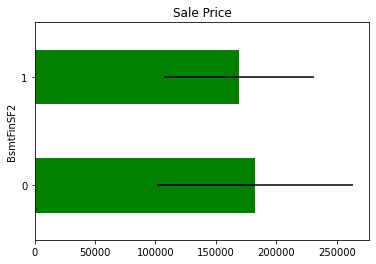

                       mean           std
LowQualFinSF                             
0             181433.747559  79414.702594
1             152652.000000  77269.103373


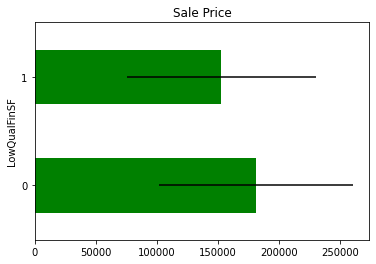

                       mean           std
EnclosedPorch                            
0              186856.88099  80573.372551
1              145192.93750  61255.351425


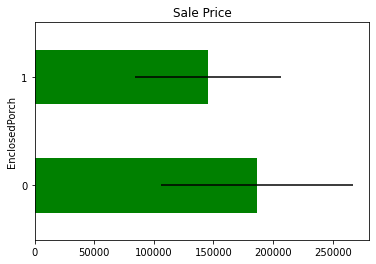

                    mean           std
3SsnPorch                             
0          180448.773677  79497.675636
1          209187.791667  72046.607624


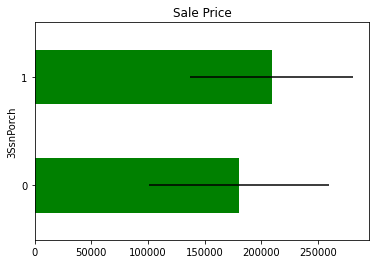

                      mean           std
ScreenPorch                             
0            178888.061756  78332.938257
1            204477.508621  88331.059485


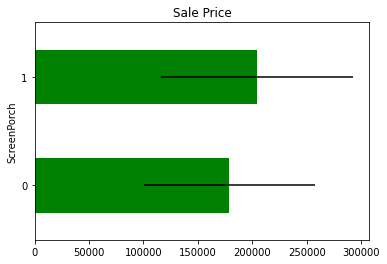

                  mean           std
MiscVal                             
0        181964.703835  80057.173616
1        152666.211538  53722.002646


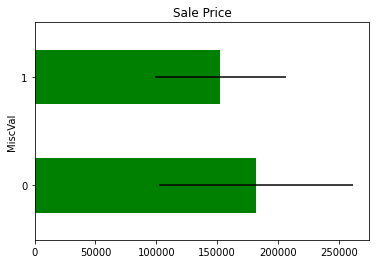

In [143]:
for var in skewed:
    
    tmp = df.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(df[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])
    print(tmp)
    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

There seem to be a difference in mean Sale Price in the mapped values, but the confidence intervals overlap, so most likely this is not significant or predictive.

-----------

<h2> Categorical Variables

In [145]:
print('Number of categorical variables: ', len(categorical_vars))

Number of categorical variables:  44


In [147]:
df[categorical_vars].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  MSSubClass  
0       WD        Normal          60  
1       WD        Normal          20  
2       WD        Normal          60  
3       WD       Abnorml          70  
4       WD        Normal          60

## Handling High-Cardinality Categorical Variables

If categorical variables have a **high cardinality** (i.e., too many unique values), using standard encoding techniques like **one-hot encoding** can lead to issues such as:  
- **Curse of Dimensionality:** Too many features can lead to overfitting.  
- **Increased Memory Usage:** A high number of dummy variables increases computational costs.  

### Strategies to Handle High Cardinality:
1. **Categorical Encoding Techniques:**
   - One-Hot Encoding (OHE): Suitable for low-cardinality categorical features but can create too many columns for high-cardinality ones.
   - Label Encoding: Assigns a unique integer to each category but may introduce unintended ordinal relationships.
   - Frequency Encoding: Replace categories with their occurrence count.
   - Target Encoding (Mean Encoding): Replace categories with the mean target value for each category (sensitive to data leakage).
   - Embedding Layers (for Neural Networks) Convert categories into dense vectors for deep learning models.


2. **Dimensionality Reduction**  
   - Grouping Rare Categories: Combine rare categories into an "Other" category.  
   - Feature Hashing: Convert categorical data into fixed-length numerical representations.  
   - Principal Component Analysis (PCA): Reduces dimensionality while preserving relationships between features.


3. **Handling Outliers in Categorical Variables:**
   - If a category appears very rarely, it may need to be grouped under an `"Other"` category.
   - Consider removing rare categories if they don’t contribute significantly to predictions.


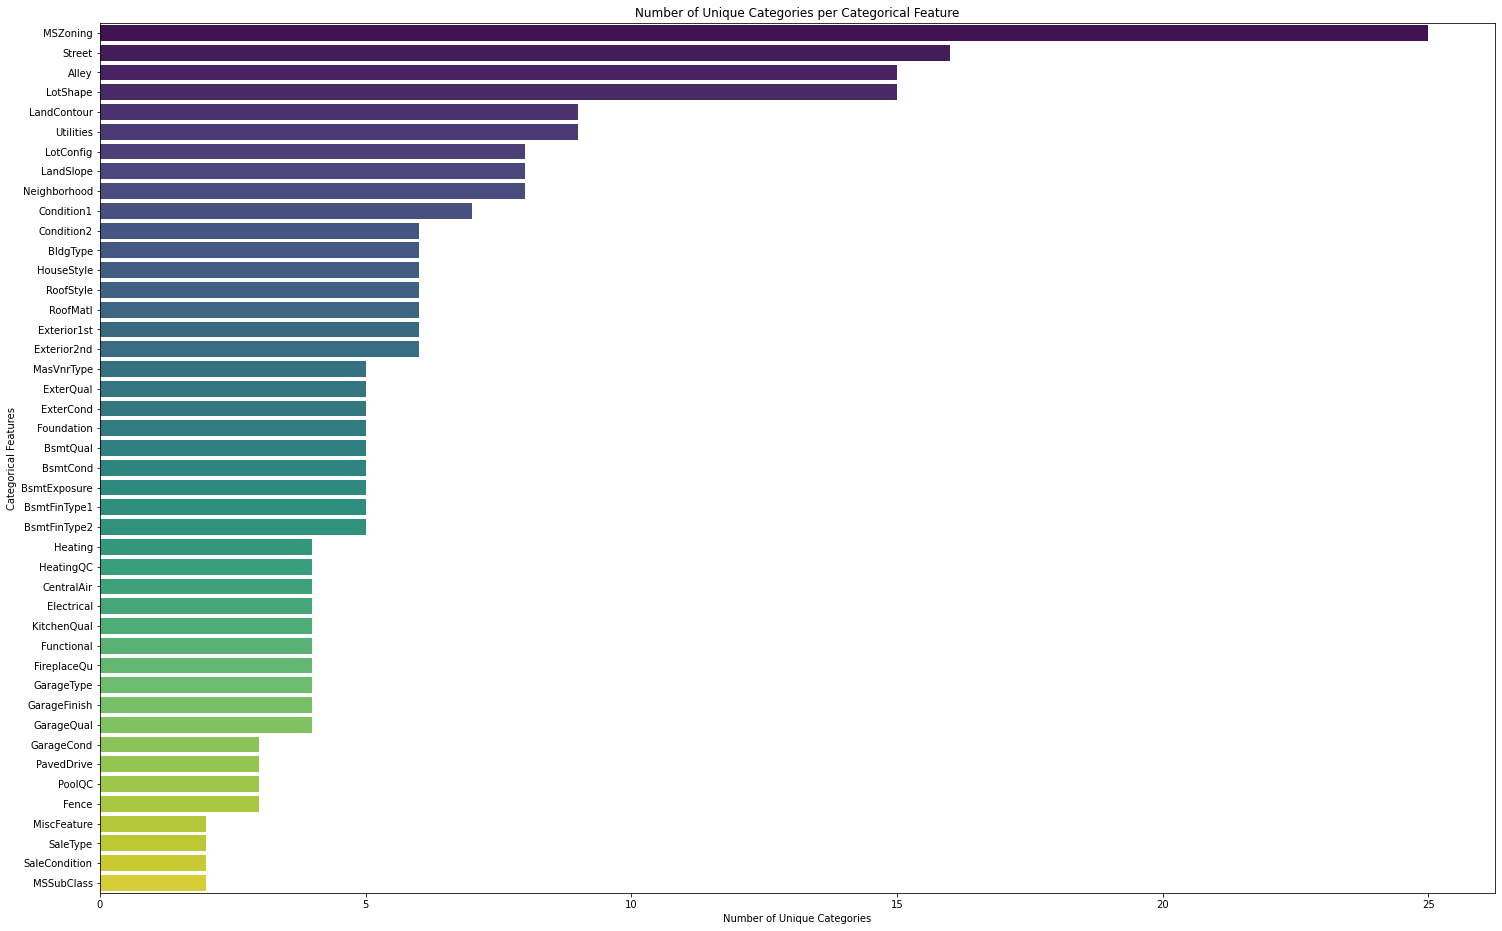

In [155]:
categorical_counts = df[categorical_vars].nunique().sort_values(ascending=False)

plt.figure(figsize=(25, 16))
sns.barplot(x=categorical_counts, y=categorical_vars, palette="viridis")
plt.xlabel("Number of Unique Categories")
plt.ylabel("Categorical Features")
plt.title("Number of Unique Categories per Categorical Feature")

plt.show()

There is no such high cardinality, only few different labels exist per label.
We will only map several values to numbers which will help also for the feature engineering task later

In [158]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    df[var] = df[var].map(qual_mappings)

In [159]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

df[var] = df[var].map(exposure_mappings)

In [160]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    df[var] = df[var].map(finish_mappings)

In [161]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

df[var] = df[var].map(garage_mappings)

In [162]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

df[var] = df[var].map(fence_mappings)

In [163]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

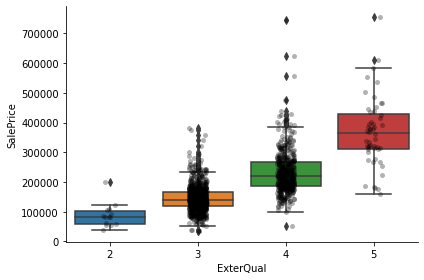

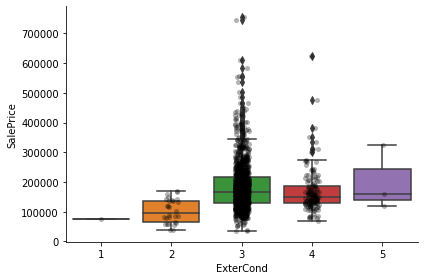

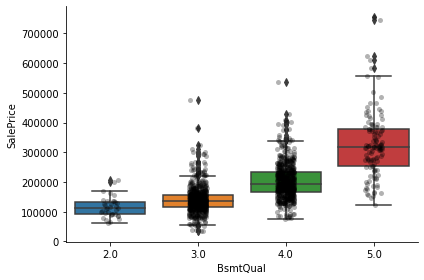

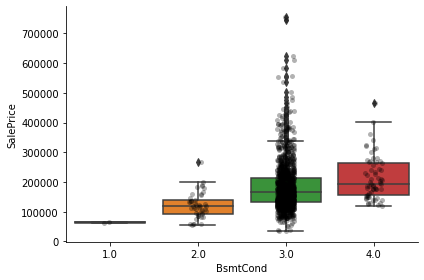

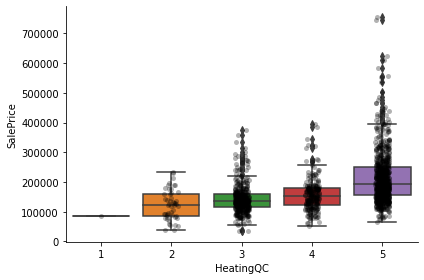

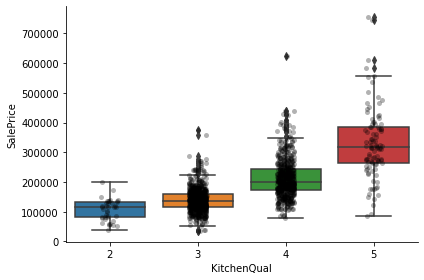

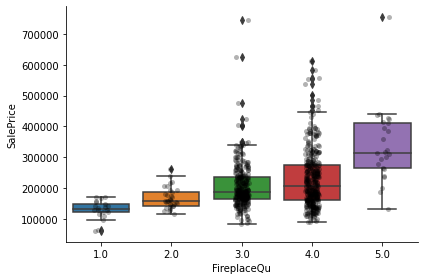

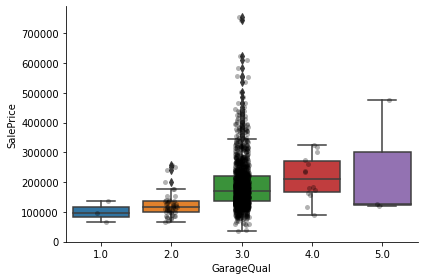

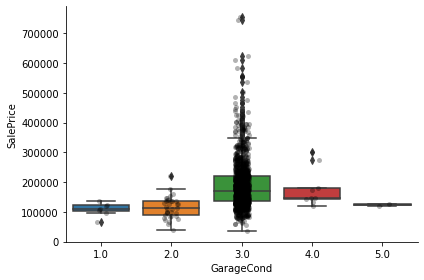

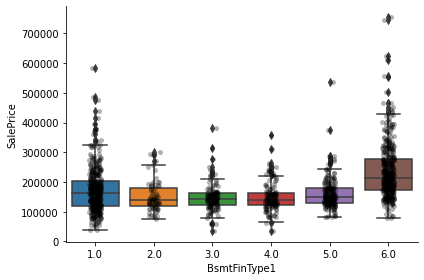

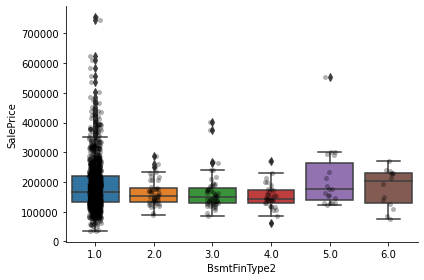

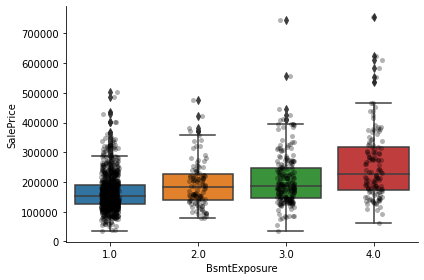

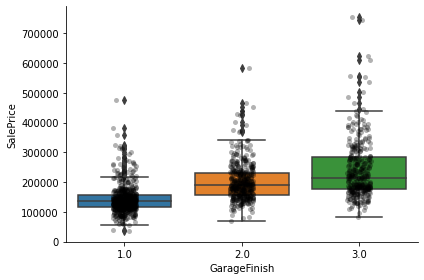

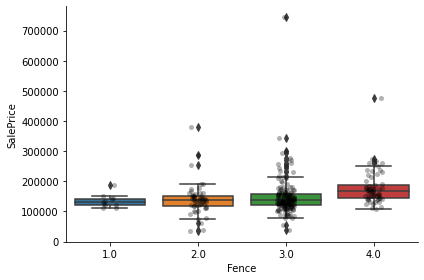

In [165]:
for var in qual_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=df, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most attributes, the increase in the house price with the value of the variable, is quite clear.

In [169]:
# capture the remaining categorical variables

categorical_others = [
    var for var in categorical_vars if var not in qual_vars
]

len(categorical_others)

30

-------------

## Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [172]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in categorical_others:
    print(analyse_rare_labels(df, var, 0.05))
    print()

MSZoning
C (all)    0.006849
FV         0.044521
RH         0.010959
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Alley
Grvl    0.034247
Pave    0.028082
Name: SalePrice, dtype: float64

LotShape
IR2    0.028082
IR3    0.006849
Name: SalePrice, dtype: float64

LandContour
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: SalePrice, dtype: float64

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR2    0.032192
FR3    0.002740
Name: SalePrice, dtype: float64

LandSlope
Mod    0.044521
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blmngtn    0.011644
Blueste    0.001370
BrDale     0.010959
BrkSide    0.039726
ClearCr    0.019178
Crawfor    0.034932
IDOTRR     0.025342
MeadowV    0.011644
Mitchel    0.033562
NPkVill    0.006164
NoRidge    0.028082
SWISU      0.017123
SawyerW    0.040411
StoneBr    0.017123
Timber     0.026027
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
Artery    0.0

Some of the categorical variables show multiple labels that are present in less than 5% of the houses. 

Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. 

That is why we want to remove them.

Finally, we want to explore the relationship between the categories of the different variables and the house sale price:

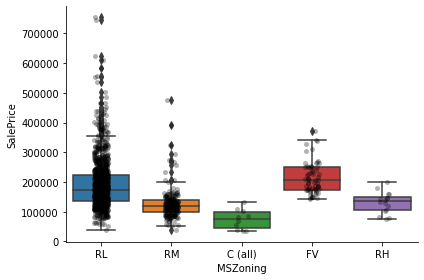

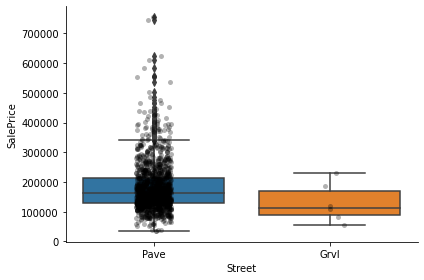

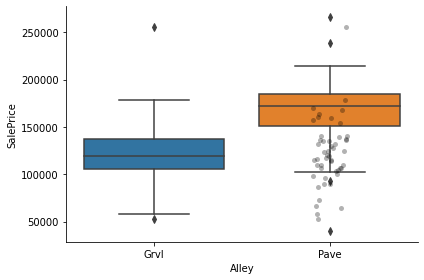

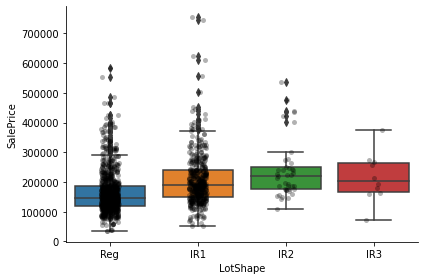

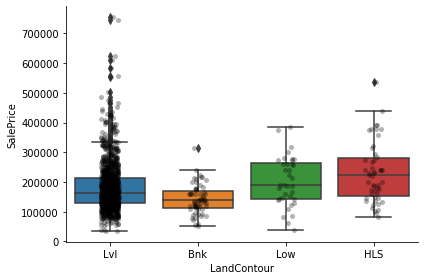

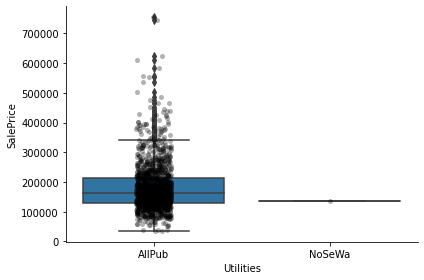

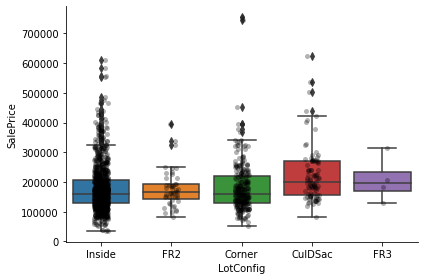

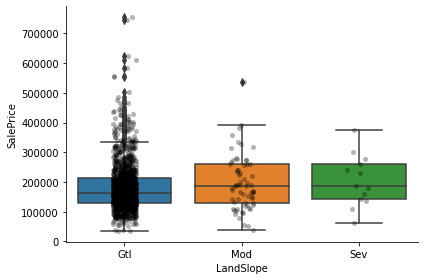

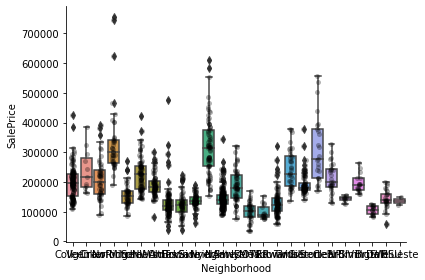

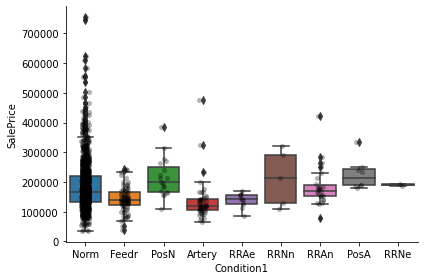

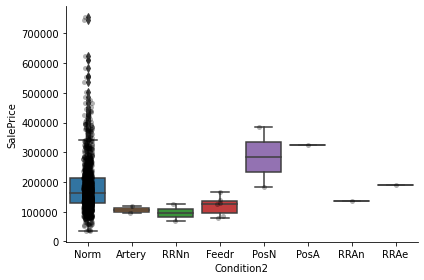

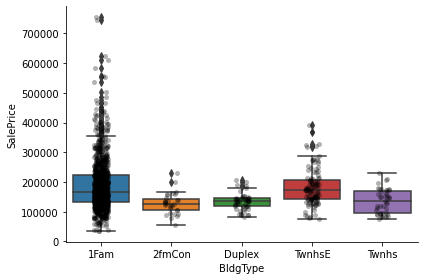

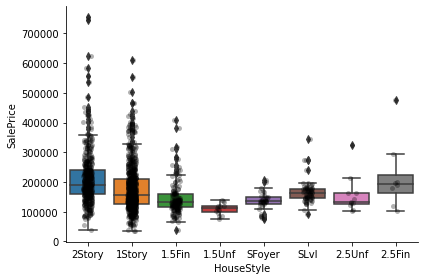

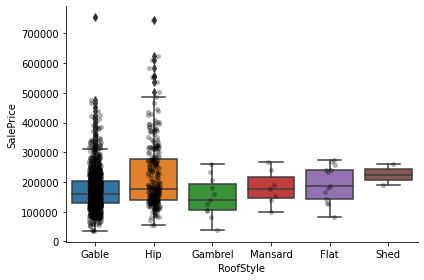

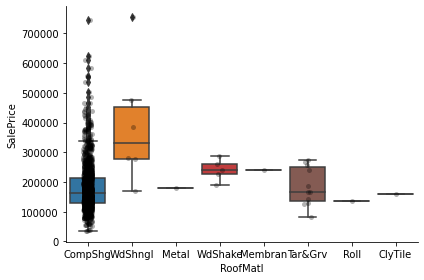

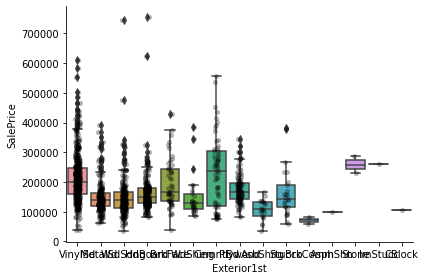

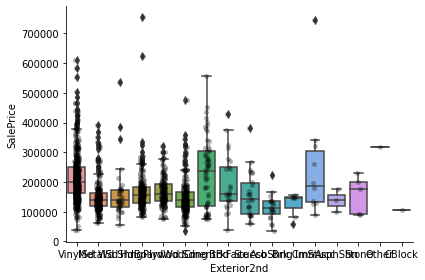

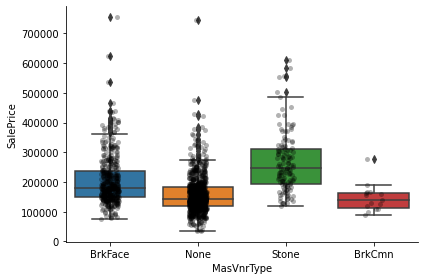

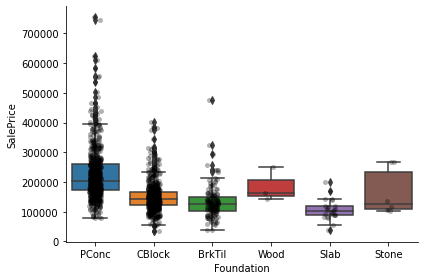

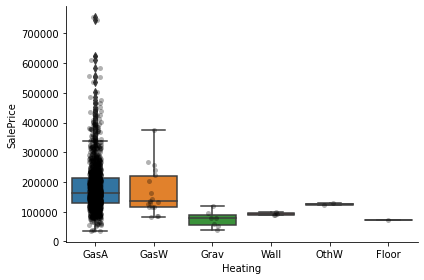

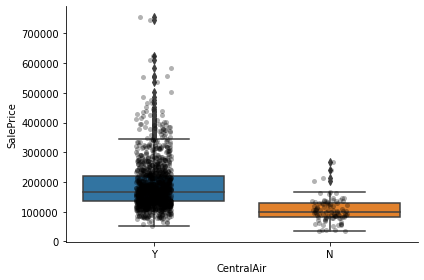

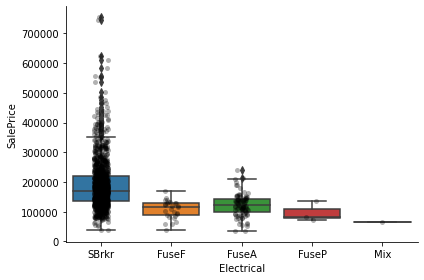

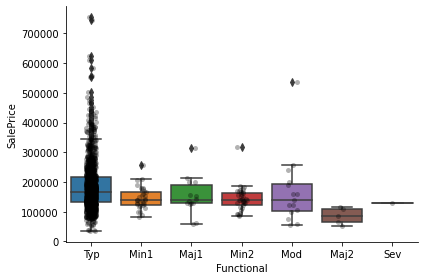

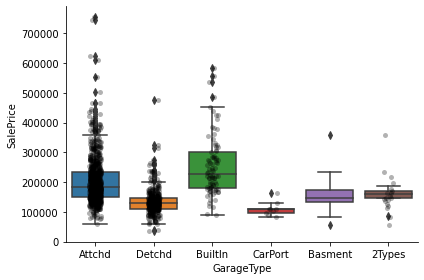

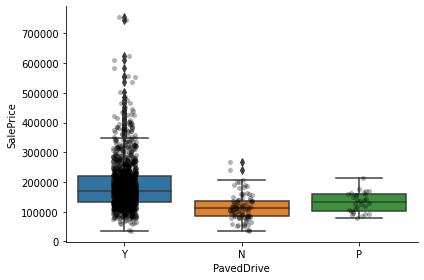

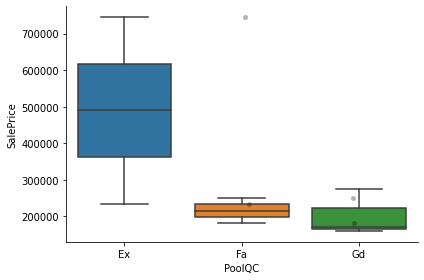

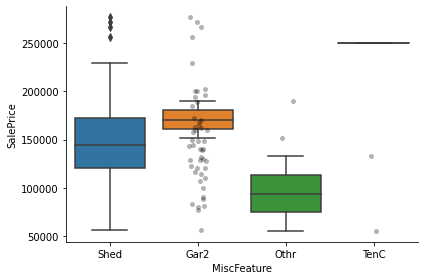

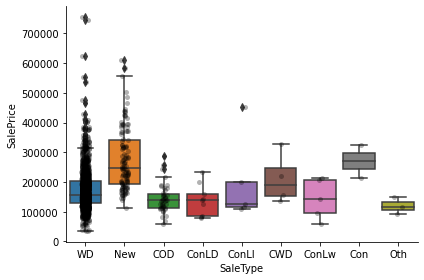

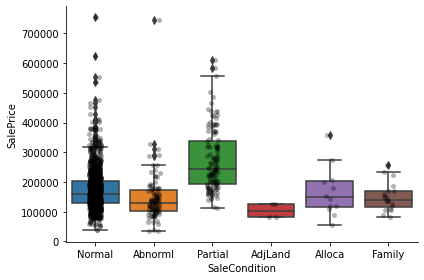

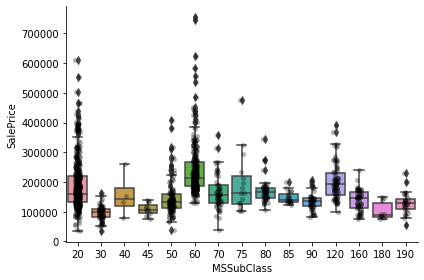

In [173]:
for var in categorical_others:
    sns.catplot(x=var, y='SalePrice', data=df, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()